In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/PROJECT/faii/FS_and_Failure__20_-_22_.csv')
data

,L/B,R/B,Grammar,β,Su,FS เฉลี่ย,Failure,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,5,2,16,30,50,5.2835,7.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,2,16,45,50,5.3670,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,2,16,60,50,5.4240,6.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,5,16,30,50,4.8295,11.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,16,45,50,4.8745,10.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,40,10,22,45,200,2.3640,37.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1340,40,10,22,60,200,2.3615,38.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1341,40,15,22,30,200,2.1750,44.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1342,40,15,22,45,200,2.1750,44.3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = data.loc[:,['L/B','R/B','Grammar','β','Su','FS เฉลี่ย','Failure']]
df

,L/B,R/B,Grammar,β,Su,FS เฉลี่ย,Failure
0,5,2,16,30,50,5.2835,7.5
1,5,2,16,45,50,5.3670,7.0
2,5,2,16,60,50,5.4240,6.5
3,5,5,16,30,50,4.8295,11.1
4,5,5,16,45,50,4.8745,10.0
...,...,...,...,...,...,...,...
1339,40,10,22,45,200,2.3640,37.2
1340,40,10,22,60,200,2.3615,38.0
1341,40,15,22,30,200,2.1750,44.3
1342,40,15,22,45,200,2.1750,44.3


In [ ]:
df.describe()

,L/B,R/B,Grammar,β,Su,FS เฉลี่ย,Failure
count,1344.000000,1344.00000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000
mean,18.750000,8.00000,18.857143,45.000000,125.000000,5.330434,22.307217
std,13.409746,4.95159,2.100344,12.252008,55.922508,4.331661,10.378163
min,5.000000,2.00000,16.000000,30.000000,50.000000,0.543000,6.500000
25%,8.750000,4.25000,17.000000,30.000000,87.500000,2.170125,14.000000
50%,15.000000,7.50000,19.000000,45.000000,125.000000,3.893500,20.000000
75%,25.000000,11.25000,21.000000,60.000000,162.500000,7.324375,30.800000
max,40.000000,15.00000,22.000000,60.000000,200.000000,21.885500,47.000000


In [ ]:
df.corr() #บอกค่าอธิพล

,L/B,R/B,Grammar,β,Su,FS เฉลี่ย,Failure
L/B,1.000000e+00,1.195199e-16,3.369967e-16,-1.146401e-16,1.171721e-16,-0.629924,0.865847
R/B,1.195199e-16,1.000000e+00,7.640979e-16,-2.075579e-17,4.065880e-17,-0.128204,0.483950
Grammar,3.369967e-16,7.640979e-16,1.000000e+00,-3.918676e-15,8.684486e-17,-0.131621,0.007569
β,-1.146401e-16,-2.075579e-17,-3.918676e-15,1.000000e+00,-4.274806e-17,0.002147,-0.015174
Su,1.171721e-16,4.065880e-17,8.684486e-17,-4.274806e-17,1.000000e+00,0.550832,0.002287
FS เฉลี่ย,-6.299236e-01,-1.282043e-01,-1.316209e-01,2.147181e-03,5.508320e-01,1.000000,-0.599878
Failure,8.658466e-01,4.839495e-01,7.569284e-03,-1.517419e-02,2.286896e-03,-0.599878,1.000000


In [ ]:
df.isnull().sum()

L/B          0
R/B          0
Grammar      0
β            0
Su           0
FS เฉลี่ย    0
Failure      0
dtype: int64

In [ ]:
df.columns

Index(['L/B', 'R/B', 'Grammar', 'β', 'Su', 'FS เฉลี่ย', 'Failure'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   L/B        1344 non-null   int64  
 1   R/B        1344 non-null   int64  
 2   Grammar    1344 non-null   int64  
 3   β          1344 non-null   int64  
 4   Su         1344 non-null   int64  
 5   FS เฉลี่ย  1344 non-null   float64
 6   Failure    1344 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.6 KB


In [ ]:
X = df.iloc[:, : -2]
y = df.iloc[:,-2]

X,y

(      L/B  R/B  Grammar   β   Su
 0       5    2       16  30   50
 1       5    2       16  45   50
 2       5    2       16  60   50
 3       5    5       16  30   50
 4       5    5       16  45   50
 ...   ...  ...      ...  ..  ...
 1339   40   10       22  45  200
 1340   40   10       22  60  200
 1341   40   15       22  30  200
 1342   40   15       22  45  200
 1343   40   15       22  60  200
 
 [1344 rows x 5 columns],
 0       5.2835
 1       5.3670
 2       5.4240
 3       4.8295
 4       4.8745
          ...  
 1339    2.3640
 1340    2.3615
 1341    2.1750
 1342    2.1750
 1343    2.1710
 Name: FS เฉลี่ย, Length: 1344, dtype: float64)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape

(940, 5)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42) #n_estimators=100 จำนวนต้นไม้
model.fit(X_train,y_train) #.fit คือการเอาโมเดลมาเทรน

RandomForestRegressor(random_state=42)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [ ]:
print('The training r_sq is ; %.5f'% model.score(X_train,y_train))

The training r_sq is ; 0.99973


In [ ]:
ytrain_pred = model.predict(X_train)

In [ ]:
print('The training r_sq is ; %.5f'% model.score(X_train,y_train))
print('The MAS is: %.5f'% mean_absolute_error(y_train, ytrain_pred))
print('The MSE is: %.5f'% mean_squared_error(y_train, ytrain_pred))
print('The RMSE is: %.5f'% np.sqrt(mean_squared_error(y_train, ytrain_pred)))
print('The EVS is: %.5f'% explained_variance_score(y_train, ytrain_pred))

The training r_sq is ; 0.99973
The MAS is: 0.03097
The MSE is: 0.00497
The RMSE is: 0.07051
The EVS is: 0.99973


In [ ]:
ytest_pred = model.predict(X_test)
print(ytest_pred[:])

[ 8.829595   4.31902    3.67896    8.48592   14.11203    7.983755
  2.553485   1.601595   6.914725   8.22849    8.359395   2.378835
  4.43638   13.004295  16.031515  17.74285    1.773605   2.78018
  4.07883    4.2125     7.39692    3.105015   4.2125     4.66314
  4.97665    2.467265   7.49469    9.72507    6.090655   3.01494
 10.93544    3.335505   2.832255   8.39362    2.298035   4.677525
  3.748055   5.06292    0.608655   2.775285   2.94117    2.696385
 13.88572    3.8396     0.7112    14.053905   4.49629    3.758
 11.90279    1.160545   3.14855    5.30454    4.161595   4.439555
  4.197815  14.083595   4.1142     4.615875   5.200645   0.59835
  1.60693   14.27691    1.7757     0.76896   10.68877    7.295165
  3.25815    4.96777    2.558525   5.348665   3.648455   4.11536
  7.292545   6.89019   17.766625   2.48944   15.74528    2.85984
  1.193705   1.28923    1.27487    2.006335   0.88934    3.00919
  2.94117    8.00554    5.48066    1.41308   12.30589    2.313915
 13.704455   5.95175

In [ ]:
print('The testing r_sq is ; %.5f'% model.score(X_test,y_test))
print('The MAS is: %.5f'% mean_absolute_error(y_test, ytest_pred))
print('The MSE is: %.5f'% mean_squared_error(y_test, ytest_pred))
print('The RMSE is: %.5f'% np.sqrt(mean_squared_error(y_test, ytest_pred)))
print('The EVS is: %.5f'% explained_variance_score(y_test, ytest_pred))

The testing r_sq is ; 0.99873
The MAS is: 0.07431
The MSE is: 0.02452
The RMSE is: 0.15660
The EVS is: 0.99873


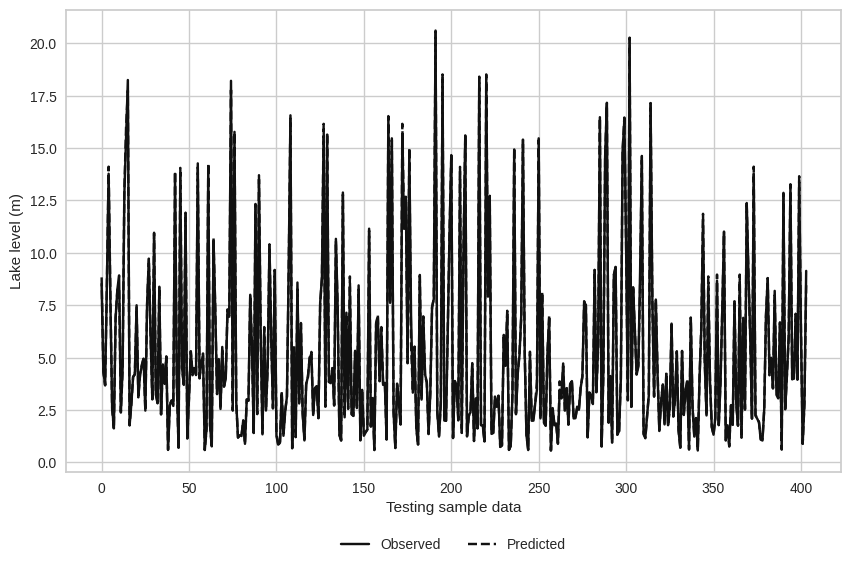

In [ ]:
plt.rcParams['figure.figsize'] = (10,6)
x_ax = range(len(X_test))
plt.plot(x_ax, y_test, label = 'Observed', color = 'k', linestyle ='-')
plt.plot(x_ax, ytest_pred, label = 'Predicted', color = 'k', linestyle ='--')
plt.ylabel('Lake level (m)')
plt.xlabel('Testing sample data')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


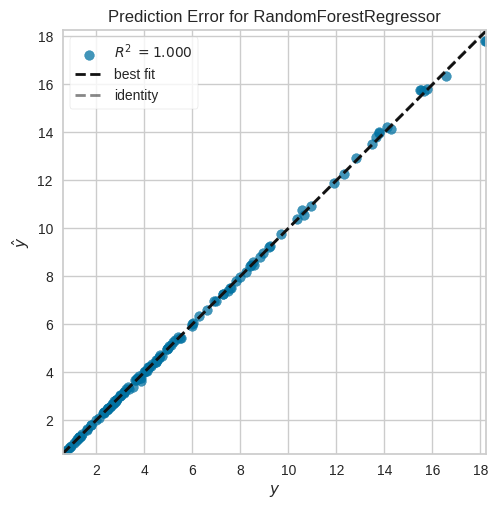

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
#plotting the prediction errors
from yellowbrick.regressor import PredictionError
Visualizer =  PredictionError(model)
Visualizer.fit(X_train,y_train)
Visualizer.score(X_test, y_test)
Visualizer.poof()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


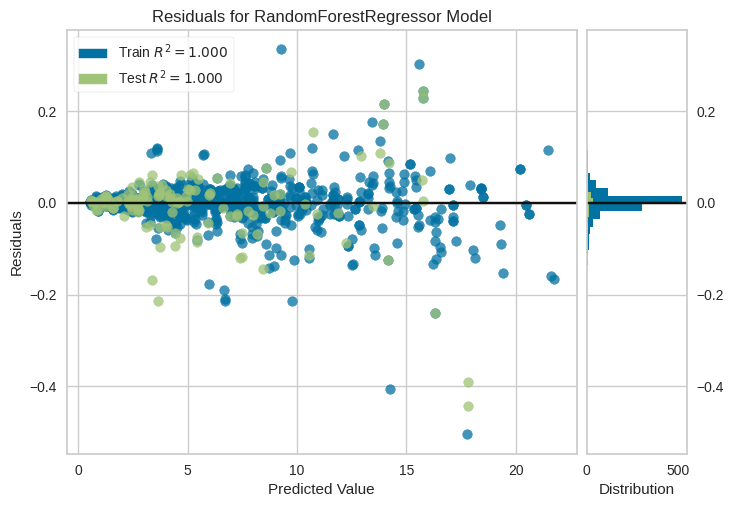

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
#plotting the residuals
from yellowbrick.regressor import ResidualsPlot
Visualizer =  ResidualsPlot(model)
Visualizer.fit(X_train,y_train)
Visualizer.score(X_test, y_test)
Visualizer.poof()

In [ ]:
#The k-fold CV
from sklearn.model_selection import cross_val_score
#training model CV
score_train = cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)
score_train

array([-0.01241223, -0.00891932, -0.02452602, -0.02540654, -0.00855099,
       -0.01797329, -0.02526189, -0.00815122, -0.00654455, -0.01463089])

In [ ]:
#the absolute mean score
from numpy import absolute
print(absolute(np.mean(score_train)))

0.015237693350395373


In [ ]:
#the mean score
print(np.mean(score_train))

-0.015237693350395373


In [ ]:
#the testing model CV
score_test = cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)
score_test

array([-0.01241223, -0.00891932, -0.02452602, -0.02540654, -0.00855099,
       -0.01797329, -0.02526189, -0.00815122, -0.00654455, -0.01463089])

In [ ]:
print(absolute(np.mean(score_test)))

0.015237693350395373


In [ ]:
#Random Forest Feature Rankinig
#import pandas as pd
from sklearn.pipeline import Pipeline

In [ ]:
f_list = list(X.columns)
f_importance = pd.Series(model.feature_importances_, index = f_list).sort_values(ascending = False)

In [ ]:
print(f_importance)

L/B        0.548296
Su         0.396394
Grammar    0.030179
R/B        0.024870
β          0.000261
dtype: float64


In [ ]:
#predicts = pd.DataFrame(predicts, columns=['y_Predict'])
#predicts

,y_Predict
0,8.594430
1,4.314345
2,3.703770
3,8.444910
4,13.988280
...,...
130,3.746265
131,3.821285
132,4.512925
133,2.727565


In [ ]:
#y_test

286     8.5175
261     4.3350
963     3.6865
210     8.4515
221    13.7735
        ...   
583     3.8435
839     3.7820
316     4.5020
762     2.7400
661    10.6685
Name: FS เฉลี่ย, Length: 135, dtype: float64

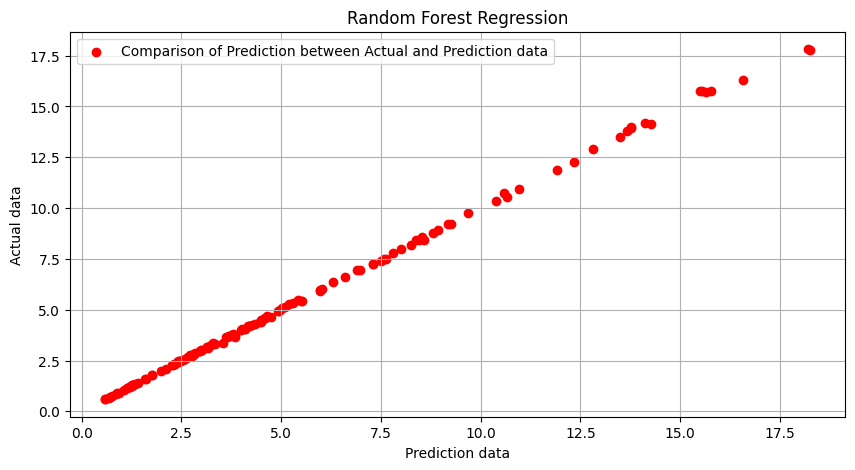

In [ ]:
#plt.figure(figsize=(10,5))
#plt.scatter(y_test,predicts, color = 'red', label = 'Comparison of Prediction between Actual and Prediction data')
#plt.legend()
#plt.grid()
#plt.title('Random Forest Regression')
#plt.xlabel('Prediction data')
#plt.ylabel('Actual data')
#plt.show()

In [ ]:
metrics.r2_score(y_test,predicts)

0.9996076126292719

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
print('MAE:ค่าเฉลี่ยความคลาดเคลื่อนสัมบูรณ์ =',mean_absolute_error(y_test, predicts))
print('MSE:ค่าเฉลี่ยความคลาดเคลื่อนยกกำลังสอง =', mean_squared_error(y_test, predicts))
print('RSME:รากที่สองของค่าเฉลี่ยความคลาดเคลื่อนยกกำลังสอง =', np.sqrt(mean_squared_error(y_test, predicts)))

MAE:ค่าเฉลี่ยความคลาดเคลื่อนสัมบูรณ์ = 0.04698368148148176
MSE:ค่าเฉลี่ยความคลาดเคลื่อนยกกำลังสอง = 0.006970917661770354
RSME:รากที่สองของค่าเฉลี่ยความคลาดเคลื่อนยกกำลังสอง = 0.08349202154559653
